# Validation - Static tests

With this Jupyter Notebook you can analyze the correct execution of our neural network. All this cells are the "static tests" where we can check the accuracy and create a confusion matrix to analyze the classification of each image in its respective node.

## Load your model

With the cell below it is possible to delete the model stored in the memory of the notebook (if necessary).

In [2]:
del model

In this cell you can load a neural network saved on disk to do validation test on it.

In [3]:
from keras.models import load_model
model = load_model('Neural_Network.h5')

## Validation with .evaluate_generator() from Keras

In this cell you can create an ImageDataGenerator with the validation samples and check the accuracy of the neural network.

This takes around 5 minutes in a CPU, with a GPU it would take less time.

In [7]:
# Imports: ImageDataGenerator to read images and time to count time.
from keras.preprocessing.image import ImageDataGenerator
import time

# Important information as the place were the validation data is, the number of samples or the batch size.
validation_data_dir = 'dataset/validation'
batch_size = 124
nb_validation_samples = 4700

# We read the samples with a ImageDataGenerator, that way our memory will not overflow.
validation_generator = ImageDataGenerator().flow_from_directory(
    validation_data_dir,
    target_size=(72,128),
    batch_size=batch_size,
    class_mode='categorical')

# Execution with model.evaluate_generator().
print("")
print("Validation starts")
start = time.time()
score = model.evaluate_generator(validation_generator, nb_validation_samples/batch_size, workers=1)
end = time.time()
print("Validation finishes")
print("")
print("Validation with model.evaluate_generator() took " + str(end - start) + " seconds")
print("")
print("Accuracy: ", score[1], "|", "Loss: ", score[0])

Found 4679 images belonging to 7 classes.

Validation starts
Validation finishes

Validation with model.evaluate_generator() took 305.21905612945557 seconds

Accuracy:  0.9908100093218678 | Loss:  0.07248106863183276


## Validation with our custom functions

In this cell I have implemented several functions that will help you to check the neural network accuracy, you will recive more data about the images that the neural network is not able to classifie in the correct class and you will generate a confusion matrix that can be drawed in next cell.

This functions usually takes more time than .evaluate_generator() from Keras, but it gives more information. In any case, in Google Colab (because the relation server <-> images) i have executated this code and it takes 20 minutes, but in a computer with the samples in the same folder it ony takes around 5 minutes for 4500 samples.

In [6]:
# Imports

# Folders readers
import glob
import os,shutil
# Image readers
from PIL import Image
import cv2
# Numpy for images and the confusion matrix
import numpy as np
# To count time
import time

# Neural network image dimensions
img_width,img_height = 128,72

# This function look for the class with more probabilities
def lookForBest(prediction):
    best = 0
    categories = 6
    for i,probability in enumerate(prediction[0]):
        if probability > prediction[0][best]:
            best = i
    return best

# This function predict the label with the NN
def predictImg(img, realLabel, model):
    prediction = model.predict(img)
    best = lookForBest(prediction)
    if(realLabel != best):
            print("ERROR IN CLASSIFICATION")
    print("\tReal label: \tNode" + str(realLabel) + " - " + str(prediction[0][realLabel]*100) + "%")
    print("\tPrediction: \tNode" + str(best) + " - " + str(prediction[0][best]*100) + "%")
    return best


# Execution
totalImages = 0
confusionMatrix = [
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0] 
    ]

start = time.time()
for directory in glob.glob("dataset/validation/*"):
    label = int(directory.split("Nodo")[1]) - 1
    for imgUrl in glob.glob(directory + "/*"):
        # Image preprocessing
        print("Image: " + str(imgUrl))
        img = cv2.imread(imgUrl)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(img).convert('RGB')
        img.thumbnail( (img_width, img_height), Image.ANTIALIAS)
        img = np.expand_dims(img, axis=0)
        # Neural Network prediction
        best = predictImg(img, label, model)
        totalImages = totalImages + 1
        confusionMatrix[label][best] = confusionMatrix[label][best] + 1
        print("Total Images: " + str(totalImages))
        print(confusionMatrix)
        print("_______________________________________________________________________")
end = time.time()
print("Validation with our functions took " + str(end - start) + " seconds")

Image: dataset/validation\Nodo1\img1.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 1
[[1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img1008.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 2
[[2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img1009.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 3
[[3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
___________________

	Real label: 	Node0 - 99.99996423721313%
	Prediction: 	Node0 - 99.99996423721313%
Total Images: 24
[[24, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img1156.jpg
	Real label: 	Node0 - 99.99994039535522%
	Prediction: 	Node0 - 99.99994039535522%
Total Images: 25
[[25, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img1158.jpg
	Real label: 	Node0 - 99.99995231628418%
	Prediction: 	Node0 - 99.99995231628418%
Total Images: 26
[[26, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0

	Real label: 	Node0 - 67.20638275146484%
	Prediction: 	Node0 - 67.20638275146484%
Total Images: 48
[[48, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img1264.jpg
	Real label: 	Node0 - 85.82403659820557%
	Prediction: 	Node0 - 85.82403659820557%
Total Images: 49
[[49, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img127.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 50
[[50, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______

	Real label: 	Node0 - 99.99135732650757%
	Prediction: 	Node0 - 99.99135732650757%
Total Images: 72
[[69, 3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img1382.jpg
	Real label: 	Node0 - 99.9868631362915%
	Prediction: 	Node0 - 99.9868631362915%
Total Images: 73
[[70, 3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img1389.jpg
	Real label: 	Node0 - 99.9786913394928%
	Prediction: 	Node0 - 99.9786913394928%
Total Images: 74
[[71, 3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0,

	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 95
[[92, 3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img1505.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 96
[[93, 3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img1514.jpg
	Real label: 	Node0 - 99.99998807907104%
	Prediction: 	Node0 - 99.99998807907104%
Total Images: 97
[[94, 3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
______________________________

[[114, 3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img1672.jpg
	Real label: 	Node0 - 98.7722098827362%
	Prediction: 	Node0 - 98.7722098827362%
Total Images: 118
[[115, 3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img1681.jpg
	Real label: 	Node0 - 99.56502318382263%
	Prediction: 	Node0 - 99.56502318382263%
Total Images: 119
[[116, 3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image:

	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 141
[[138, 3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img1816.jpg
	Real label: 	Node0 - 99.97327923774719%
	Prediction: 	Node0 - 99.97327923774719%
Total Images: 142
[[139, 3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img182.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 143
[[140, 3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_________________________

ERROR IN CLASSIFICATION
	Real label: 	Node0 - 0.8271945640444756%
	Prediction: 	Node5 - 99.16934370994568%
Total Images: 165
[[157, 3, 0, 0, 0, 5, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img1944.jpg
ERROR IN CLASSIFICATION
	Real label: 	Node0 - 4.5289527624845505%
	Prediction: 	Node5 - 95.46753168106079%
Total Images: 166
[[157, 3, 0, 0, 0, 6, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img1946.jpg
ERROR IN CLASSIFICATION
	Real label: 	Node0 - 3.398171067237854%
	Prediction: 	Node5 - 96.59978151321411%
Total Images: 167
[[157, 3, 0, 0, 0, 7, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0

	Real label: 	Node0 - 99.99529123306274%
	Prediction: 	Node0 - 99.99529123306274%
Total Images: 189
[[172, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img2070.jpg
	Real label: 	Node0 - 99.99953508377075%
	Prediction: 	Node0 - 99.99953508377075%
Total Images: 190
[[173, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img2073.jpg
	Real label: 	Node0 - 99.99985694885254%
	Prediction: 	Node0 - 99.99985694885254%
Total Images: 191
[[174, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 

	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 213
[[196, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img2228.jpg
	Real label: 	Node0 - 99.99184608459473%
	Prediction: 	Node0 - 99.99184608459473%
Total Images: 214
[[197, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img2234.jpg
	Real label: 	Node0 - 99.99574422836304%
	Prediction: 	Node0 - 99.99574422836304%
Total Images: 215
[[198, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0

	Real label: 	Node0 - 99.99915361404419%
	Prediction: 	Node0 - 99.99915361404419%
Total Images: 237
[[220, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img241.jpg
	Real label: 	Node0 - 99.9994158744812%
	Prediction: 	Node0 - 99.9994158744812%
Total Images: 238
[[221, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img2415.jpg
	Real label: 	Node0 - 99.99970197677612%
	Prediction: 	Node0 - 99.99970197677612%
Total Images: 239
[[222, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],

	Real label: 	Node0 - 99.99946355819702%
	Prediction: 	Node0 - 99.99946355819702%
Total Images: 261
[[244, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img256.jpg
	Real label: 	Node0 - 99.99970197677612%
	Prediction: 	Node0 - 99.99970197677612%
Total Images: 262
[[245, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img2570.jpg
	Real label: 	Node0 - 99.99997615814209%
	Prediction: 	Node0 - 99.99997615814209%
Total Images: 263
[[246, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0

	Real label: 	Node0 - 99.99988079071045%
	Prediction: 	Node0 - 99.99988079071045%
Total Images: 285
[[268, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img2676.jpg
	Real label: 	Node0 - 99.99997615814209%
	Prediction: 	Node0 - 99.99997615814209%
Total Images: 286
[[269, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img268.jpg
	Real label: 	Node0 - 99.99997615814209%
	Prediction: 	Node0 - 99.99997615814209%
Total Images: 287
[[270, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0

	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 309
[[292, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img2837.jpg
	Real label: 	Node0 - 99.99880790710449%
	Prediction: 	Node0 - 99.99880790710449%
Total Images: 310
[[293, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img2838.jpg
	Real label: 	Node0 - 99.99974966049194%
	Prediction: 	Node0 - 99.99974966049194%
Total Images: 311
[[294, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0

	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 333
[[316, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img2962.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 334
[[317, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img2968.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 335
[[318, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_____________________________________________

	Real label: 	Node0 - 99.99966621398926%
	Prediction: 	Node0 - 99.99966621398926%
Total Images: 356
[[339, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img3140.jpg
	Real label: 	Node0 - 99.99990463256836%
	Prediction: 	Node0 - 99.99990463256836%
Total Images: 357
[[340, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img3141.jpg
	Real label: 	Node0 - 99.99991655349731%
	Prediction: 	Node0 - 99.99991655349731%
Total Images: 358
[[341, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 

	Real label: 	Node0 - 99.99995231628418%
	Prediction: 	Node0 - 99.99995231628418%
Total Images: 380
[[363, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img3335.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 381
[[364, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img3340.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 382
[[365, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_____________________

	Real label: 	Node0 - 99.99992847442627%
	Prediction: 	Node0 - 99.99992847442627%
Total Images: 404
[[387, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img3462.jpg
	Real label: 	Node0 - 99.99932050704956%
	Prediction: 	Node0 - 99.99932050704956%
Total Images: 405
[[388, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img3472.jpg
	Real label: 	Node0 - 99.99850988388062%
	Prediction: 	Node0 - 99.99850988388062%
Total Images: 406
[[389, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 

	Real label: 	Node0 - 99.99997615814209%
	Prediction: 	Node0 - 99.99997615814209%
Total Images: 429
[[412, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img3614.jpg
	Real label: 	Node0 - 99.99998807907104%
	Prediction: 	Node0 - 99.99998807907104%
Total Images: 430
[[413, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img3615.jpg
	Real label: 	Node0 - 99.99998807907104%
	Prediction: 	Node0 - 99.99998807907104%
Total Images: 431
[[414, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 

	Real label: 	Node0 - 99.99998807907104%
	Prediction: 	Node0 - 99.99998807907104%
Total Images: 453
[[436, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img3735.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 454
[[437, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img3742.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 455
[[438, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_____________________

	Real label: 	Node0 - 99.99997615814209%
	Prediction: 	Node0 - 99.99997615814209%
Total Images: 476
[[459, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img3837.jpg
	Real label: 	Node0 - 99.99998807907104%
	Prediction: 	Node0 - 99.99998807907104%
Total Images: 477
[[460, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img3840.jpg
	Real label: 	Node0 - 99.99997615814209%
	Prediction: 	Node0 - 99.99997615814209%
Total Images: 478
[[461, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 

	Real label: 	Node0 - 99.99995231628418%
	Prediction: 	Node0 - 99.99995231628418%
Total Images: 500
[[483, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img3973.jpg
	Real label: 	Node0 - 99.99998807907104%
	Prediction: 	Node0 - 99.99998807907104%
Total Images: 501
[[484, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img3975.jpg
	Real label: 	Node0 - 99.99997615814209%
	Prediction: 	Node0 - 99.99997615814209%
Total Images: 502
[[485, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 

	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 524
[[507, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img4138.jpg
	Real label: 	Node0 - 100.0%
	Prediction: 	Node0 - 100.0%
Total Images: 525
[[508, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo1\img4143.jpg
	Real label: 	Node0 - 99.99997615814209%
	Prediction: 	Node0 - 99.99997615814209%
Total Images: 526
[[509, 3, 0, 0, 0, 14, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_____________________

	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 547
[[512, 3, 0, 0, 0, 14, 0], [0, 18, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img10117.jpg
	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 548
[[512, 3, 0, 0, 0, 14, 0], [0, 19, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img10123.jpg
	Real label: 	Node1 - 99.9998688697815%
	Prediction: 	Node1 - 99.9998688697815%
Total Images: 549
[[512, 3, 0, 0, 0, 14, 0], [0, 20, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
__________________

	Real label: 	Node1 - 99.99982118606567%
	Prediction: 	Node1 - 99.99982118606567%
Total Images: 570
[[512, 3, 0, 0, 0, 14, 0], [0, 41, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img10305.jpg
	Real label: 	Node1 - 99.99984502792358%
	Prediction: 	Node1 - 99.99984502792358%
Total Images: 571
[[512, 3, 0, 0, 0, 14, 0], [0, 42, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img10320.jpg
	Real label: 	Node1 - 99.99997615814209%
	Prediction: 	Node1 - 99.99997615814209%
Total Images: 572
[[512, 3, 0, 0, 0, 14, 0], [0, 43, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0

	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 594
[[512, 3, 0, 0, 0, 14, 0], [0, 65, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img10483.jpg
	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 595
[[512, 3, 0, 0, 0, 14, 0], [0, 66, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img10487.jpg
	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 596
[[512, 3, 0, 0, 0, 14, 0], [0, 67, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
________________________________________

	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 617
[[512, 3, 0, 0, 0, 14, 0], [0, 88, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img10703.jpg
	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 618
[[512, 3, 0, 0, 0, 14, 0], [0, 89, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img10718.jpg
	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 619
[[512, 3, 0, 0, 0, 14, 0], [0, 90, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
________________________________________

	Real label: 	Node1 - 66.56469702720642%
	Prediction: 	Node1 - 66.56469702720642%
Total Images: 642
[[512, 3, 0, 0, 0, 14, 0], [0, 113, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img10900.jpg
	Real label: 	Node1 - 61.17393374443054%
	Prediction: 	Node1 - 61.17393374443054%
Total Images: 643
[[512, 3, 0, 0, 0, 14, 0], [0, 114, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img10905.jpg
	Real label: 	Node1 - 76.15544199943542%
	Prediction: 	Node1 - 76.15544199943542%
Total Images: 644
[[512, 3, 0, 0, 0, 14, 0], [0, 115, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0

	Real label: 	Node1 - 99.6709942817688%
	Prediction: 	Node1 - 99.6709942817688%
Total Images: 664
[[512, 3, 0, 0, 0, 14, 0], [0, 135, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img11097.jpg
	Real label: 	Node1 - 99.95214939117432%
	Prediction: 	Node1 - 99.95214939117432%
Total Images: 665
[[512, 3, 0, 0, 0, 14, 0], [0, 136, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img11108.jpg
	Real label: 	Node1 - 99.99995231628418%
	Prediction: 	Node1 - 99.99995231628418%
Total Images: 666
[[512, 3, 0, 0, 0, 14, 0], [0, 137, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 

	Real label: 	Node1 - 99.99990463256836%
	Prediction: 	Node1 - 99.99990463256836%
Total Images: 688
[[512, 3, 0, 0, 0, 14, 0], [0, 159, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img11227.jpg
	Real label: 	Node1 - 99.99961853027344%
	Prediction: 	Node1 - 99.99961853027344%
Total Images: 689
[[512, 3, 0, 0, 0, 14, 0], [0, 160, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img11240.jpg
	Real label: 	Node1 - 99.99914169311523%
	Prediction: 	Node1 - 99.99914169311523%
Total Images: 690
[[512, 3, 0, 0, 0, 14, 0], [0, 161, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0

	Real label: 	Node1 - 99.99978542327881%
	Prediction: 	Node1 - 99.99978542327881%
Total Images: 712
[[512, 3, 0, 0, 0, 14, 0], [0, 183, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img11400.jpg
	Real label: 	Node1 - 99.99736547470093%
	Prediction: 	Node1 - 99.99736547470093%
Total Images: 713
[[512, 3, 0, 0, 0, 14, 0], [0, 184, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img11401.jpg
	Real label: 	Node1 - 99.99616146087646%
	Prediction: 	Node1 - 99.99616146087646%
Total Images: 714
[[512, 3, 0, 0, 0, 14, 0], [0, 185, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0

	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 736
[[512, 3, 0, 0, 0, 14, 0], [0, 207, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img11531.jpg
	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 737
[[512, 3, 0, 0, 0, 14, 0], [0, 208, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img11539.jpg
	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 738
[[512, 3, 0, 0, 0, 14, 0], [0, 209, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_____________________________________

	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 760
[[512, 3, 0, 0, 0, 14, 0], [0, 231, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img11730.jpg
	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 761
[[512, 3, 0, 0, 0, 14, 0], [0, 232, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img11743.jpg
	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 762
[[512, 3, 0, 0, 0, 14, 0], [0, 233, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_____________________________________

	Real label: 	Node1 - 99.9995231628418%
	Prediction: 	Node1 - 99.9995231628418%
Total Images: 784
[[512, 3, 0, 0, 0, 14, 0], [0, 255, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img11845.jpg
	Real label: 	Node1 - 99.99645948410034%
	Prediction: 	Node1 - 99.99645948410034%
Total Images: 785
[[512, 3, 0, 0, 0, 14, 0], [0, 256, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img5301.jpg
	Real label: 	Node1 - 99.75118637084961%
	Prediction: 	Node1 - 99.75118637084961%
Total Images: 786
[[512, 3, 0, 0, 0, 14, 0], [0, 257, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0

	Real label: 	Node1 - 99.99998807907104%
	Prediction: 	Node1 - 99.99998807907104%
Total Images: 808
[[512, 3, 0, 0, 0, 14, 0], [0, 279, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img5461.jpg
	Real label: 	Node1 - 99.99994039535522%
	Prediction: 	Node1 - 99.99994039535522%
Total Images: 809
[[512, 3, 0, 0, 0, 14, 0], [0, 280, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img5462.jpg
	Real label: 	Node1 - 99.99998807907104%
	Prediction: 	Node1 - 99.99998807907104%
Total Images: 810
[[512, 3, 0, 0, 0, 14, 0], [0, 281, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 

	Real label: 	Node1 - 99.99998807907104%
	Prediction: 	Node1 - 99.99998807907104%
Total Images: 832
[[512, 3, 0, 0, 0, 14, 0], [0, 303, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img5587.jpg
	Real label: 	Node1 - 99.99997615814209%
	Prediction: 	Node1 - 99.99997615814209%
Total Images: 833
[[512, 3, 0, 0, 0, 14, 0], [0, 304, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img5593.jpg
	Real label: 	Node1 - 99.99990463256836%
	Prediction: 	Node1 - 99.99990463256836%
Total Images: 834
[[512, 3, 0, 0, 0, 14, 0], [0, 305, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 

	Real label: 	Node1 - 98.2094943523407%
	Prediction: 	Node1 - 98.2094943523407%
Total Images: 856
[[512, 3, 0, 0, 0, 14, 0], [0, 327, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img5766.jpg
	Real label: 	Node1 - 99.30509328842163%
	Prediction: 	Node1 - 99.30509328842163%
Total Images: 857
[[512, 3, 0, 0, 0, 14, 0], [0, 328, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img5767.jpg
	Real label: 	Node1 - 99.78618025779724%
	Prediction: 	Node1 - 99.78618025779724%
Total Images: 858
[[512, 3, 0, 0, 0, 14, 0], [0, 329, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0,

	Real label: 	Node1 - 99.99995231628418%
	Prediction: 	Node1 - 99.99995231628418%
Total Images: 878
[[512, 3, 0, 0, 0, 14, 0], [0, 349, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img5890.jpg
	Real label: 	Node1 - 99.99992847442627%
	Prediction: 	Node1 - 99.99992847442627%
Total Images: 879
[[512, 3, 0, 0, 0, 14, 0], [0, 350, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img5896.jpg
	Real label: 	Node1 - 99.99998807907104%
	Prediction: 	Node1 - 99.99998807907104%
Total Images: 880
[[512, 3, 0, 0, 0, 14, 0], [0, 351, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 

	Real label: 	Node1 - 99.99958276748657%
	Prediction: 	Node1 - 99.99958276748657%
Total Images: 902
[[512, 3, 0, 0, 0, 14, 0], [0, 373, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img6059.jpg
	Real label: 	Node1 - 99.99983310699463%
	Prediction: 	Node1 - 99.99983310699463%
Total Images: 903
[[512, 3, 0, 0, 0, 14, 0], [0, 374, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img6083.jpg
	Real label: 	Node1 - 99.99998807907104%
	Prediction: 	Node1 - 99.99998807907104%
Total Images: 904
[[512, 3, 0, 0, 0, 14, 0], [0, 375, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 

	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 926
[[512, 3, 0, 0, 0, 14, 0], [0, 397, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img6255.jpg
	Real label: 	Node1 - 99.99998807907104%
	Prediction: 	Node1 - 99.99998807907104%
Total Images: 927
[[512, 3, 0, 0, 0, 14, 0], [0, 398, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img6259.jpg
	Real label: 	Node1 - 99.9988317489624%
	Prediction: 	Node1 - 99.9988317489624%
Total Images: 928
[[512, 3, 0, 0, 0, 14, 0], [0, 399, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 

	Real label: 	Node1 - 99.99943971633911%
	Prediction: 	Node1 - 99.99943971633911%
Total Images: 950
[[512, 3, 0, 0, 0, 14, 0], [0, 421, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img6384.jpg
	Real label: 	Node1 - 99.99997615814209%
	Prediction: 	Node1 - 99.99997615814209%
Total Images: 951
[[512, 3, 0, 0, 0, 14, 0], [0, 422, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img6418.jpg
	Real label: 	Node1 - 99.99991655349731%
	Prediction: 	Node1 - 99.99991655349731%
Total Images: 952
[[512, 3, 0, 0, 0, 14, 0], [0, 423, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 

	Real label: 	Node1 - 99.99996423721313%
	Prediction: 	Node1 - 99.99996423721313%
Total Images: 974
[[512, 3, 0, 0, 0, 14, 0], [0, 445, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img6567.jpg
	Real label: 	Node1 - 99.99994039535522%
	Prediction: 	Node1 - 99.99994039535522%
Total Images: 975
[[512, 3, 0, 0, 0, 14, 0], [0, 446, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img6571.jpg
	Real label: 	Node1 - 99.99992847442627%
	Prediction: 	Node1 - 99.99992847442627%
Total Images: 976
[[512, 3, 0, 0, 0, 14, 0], [0, 447, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 

	Real label: 	Node1 - 99.99816417694092%
	Prediction: 	Node1 - 99.99816417694092%
Total Images: 998
[[512, 3, 0, 0, 0, 14, 0], [0, 469, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img6691.jpg
	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 999
[[512, 3, 0, 0, 0, 14, 0], [0, 470, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img6692.jpg
	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 1000
[[512, 3, 0, 0, 0, 14, 0], [0, 471, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
______________

	Real label: 	Node1 - 99.98499155044556%
	Prediction: 	Node1 - 99.98499155044556%
Total Images: 1022
[[512, 3, 0, 0, 0, 14, 0], [0, 493, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img6808.jpg
	Real label: 	Node1 - 99.99350309371948%
	Prediction: 	Node1 - 99.99350309371948%
Total Images: 1023
[[512, 3, 0, 0, 0, 14, 0], [0, 494, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img6819.jpg
	Real label: 	Node1 - 99.99979734420776%
	Prediction: 	Node1 - 99.99979734420776%
Total Images: 1024
[[512, 3, 0, 0, 0, 14, 0], [0, 495, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 

	Real label: 	Node1 - 99.99973773956299%
	Prediction: 	Node1 - 99.99973773956299%
Total Images: 1046
[[512, 3, 0, 0, 0, 14, 0], [0, 517, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img6947.jpg
	Real label: 	Node1 - 99.99697208404541%
	Prediction: 	Node1 - 99.99697208404541%
Total Images: 1047
[[512, 3, 0, 0, 0, 14, 0], [0, 518, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img6948.jpg
	Real label: 	Node1 - 99.99943971633911%
	Prediction: 	Node1 - 99.99943971633911%
Total Images: 1048
[[512, 3, 0, 0, 0, 14, 0], [0, 519, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 

	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 1068
[[512, 3, 0, 0, 0, 14, 0], [0, 539, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img7063.jpg
	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 1069
[[512, 3, 0, 0, 0, 14, 0], [0, 540, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img7066.jpg
	Real label: 	Node1 - 100.0%
	Prediction: 	Node1 - 100.0%
Total Images: 1070
[[512, 3, 0, 0, 0, 14, 0], [0, 541, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
____________________________________

	Real label: 	Node1 - 99.99934434890747%
	Prediction: 	Node1 - 99.99934434890747%
Total Images: 1092
[[512, 3, 0, 0, 0, 14, 0], [0, 563, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img7219.jpg
	Real label: 	Node1 - 99.99969005584717%
	Prediction: 	Node1 - 99.99969005584717%
Total Images: 1093
[[512, 3, 0, 0, 0, 14, 0], [0, 564, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img7220.jpg
	Real label: 	Node1 - 99.99865293502808%
	Prediction: 	Node1 - 99.99865293502808%
Total Images: 1094
[[512, 3, 0, 0, 0, 14, 0], [0, 565, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 

	Real label: 	Node1 - 99.98501539230347%
	Prediction: 	Node1 - 99.98501539230347%
Total Images: 1116
[[512, 3, 0, 0, 0, 14, 0], [0, 587, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img7321.jpg
	Real label: 	Node1 - 99.98680353164673%
	Prediction: 	Node1 - 99.98680353164673%
Total Images: 1117
[[512, 3, 0, 0, 0, 14, 0], [0, 588, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img7322.jpg
	Real label: 	Node1 - 99.99266862869263%
	Prediction: 	Node1 - 99.99266862869263%
Total Images: 1118
[[512, 3, 0, 0, 0, 14, 0], [0, 589, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 

	Real label: 	Node1 - 99.99998807907104%
	Prediction: 	Node1 - 99.99998807907104%
Total Images: 1140
[[512, 3, 0, 0, 0, 14, 0], [0, 611, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img7462.jpg
	Real label: 	Node1 - 99.99772310256958%
	Prediction: 	Node1 - 99.99772310256958%
Total Images: 1141
[[512, 3, 0, 0, 0, 14, 0], [0, 612, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img7476.jpg
	Real label: 	Node1 - 99.98942613601685%
	Prediction: 	Node1 - 99.98942613601685%
Total Images: 1142
[[512, 3, 0, 0, 0, 14, 0], [0, 613, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 

	Real label: 	Node1 - 99.9994158744812%
	Prediction: 	Node1 - 99.9994158744812%
Total Images: 1164
[[512, 3, 0, 0, 0, 14, 0], [0, 633, 0, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img7649.jpg
	Real label: 	Node1 - 99.99921321868896%
	Prediction: 	Node1 - 99.99921321868896%
Total Images: 1165
[[512, 3, 0, 0, 0, 14, 0], [0, 634, 0, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo2\img7657.jpg
	Real label: 	Node1 - 99.99932050704956%
	Prediction: 	Node1 - 99.99932050704956%
Total Images: 1166
[[512, 3, 0, 0, 0, 14, 0], [0, 635, 0, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0,

	Real label: 	Node2 - 99.99939203262329%
	Prediction: 	Node2 - 99.99939203262329%
Total Images: 1188
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img11863.jpg
	Real label: 	Node2 - 99.99909400939941%
	Prediction: 	Node2 - 99.99909400939941%
Total Images: 1189
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 4, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img11864.jpg
	Real label: 	Node2 - 99.99914169311523%
	Prediction: 	Node2 - 99.99914169311523%
Total Images: 1190
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 5, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0

	Real label: 	Node2 - 99.99769926071167%
	Prediction: 	Node2 - 99.99769926071167%
Total Images: 1212
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 27, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img12021.jpg
	Real label: 	Node2 - 99.998939037323%
	Prediction: 	Node2 - 99.998939037323%
Total Images: 1213
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 28, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img12026.jpg
	Real label: 	Node2 - 99.99797344207764%
	Prediction: 	Node2 - 99.99797344207764%
Total Images: 1214
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 29, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0,

	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 1234
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 49, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img12203.jpg
	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 1235
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 50, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img12217.jpg
	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 1236
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 51, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________

	Real label: 	Node2 - 99.99996423721313%
	Prediction: 	Node2 - 99.99996423721313%
Total Images: 1258
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 73, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img12411.jpg
	Real label: 	Node2 - 99.9998688697815%
	Prediction: 	Node2 - 99.9998688697815%
Total Images: 1259
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 74, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img12415.jpg
	Real label: 	Node2 - 99.99903440475464%
	Prediction: 	Node2 - 99.99903440475464%
Total Images: 1260
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 75, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 

	Real label: 	Node2 - 99.99284744262695%
	Prediction: 	Node2 - 99.99284744262695%
Total Images: 1282
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 97, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img12558.jpg
	Real label: 	Node2 - 99.99830722808838%
	Prediction: 	Node2 - 99.99830722808838%
Total Images: 1283
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 98, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img12559.jpg
	Real label: 	Node2 - 99.9988317489624%
	Prediction: 	Node2 - 99.9988317489624%
Total Images: 1284
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 99, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 

	Real label: 	Node2 - 99.99829530715942%
	Prediction: 	Node2 - 99.99829530715942%
Total Images: 1306
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 121, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img12701.jpg
	Real label: 	Node2 - 99.99799728393555%
	Prediction: 	Node2 - 99.99799728393555%
Total Images: 1307
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 122, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img12704.jpg
	Real label: 	Node2 - 99.9984860420227%
	Prediction: 	Node2 - 99.9984860420227%
Total Images: 1308
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 123, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 

	Real label: 	Node2 - 99.9125063419342%
	Prediction: 	Node2 - 99.9125063419342%
Total Images: 1330
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 145, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img12889.jpg
	Real label: 	Node2 - 99.99479055404663%
	Prediction: 	Node2 - 99.99479055404663%
Total Images: 1331
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 146, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img12913.jpg
	Real label: 	Node2 - 99.97382760047913%
	Prediction: 	Node2 - 99.97382760047913%
Total Images: 1332
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 147, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 

	Real label: 	Node2 - 99.98688697814941%
	Prediction: 	Node2 - 99.98688697814941%
Total Images: 1353
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 168, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img13023.jpg
	Real label: 	Node2 - 99.98767375946045%
	Prediction: 	Node2 - 99.98767375946045%
Total Images: 1354
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 169, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img13029.jpg
	Real label: 	Node2 - 99.99717473983765%
	Prediction: 	Node2 - 99.99717473983765%
Total Images: 1355
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 170, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0

	Real label: 	Node2 - 99.99966621398926%
	Prediction: 	Node2 - 99.99966621398926%
Total Images: 1377
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 192, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img13159.jpg
	Real label: 	Node2 - 99.99974966049194%
	Prediction: 	Node2 - 99.99974966049194%
Total Images: 1378
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 193, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img13161.jpg
	Real label: 	Node2 - 99.99985694885254%
	Prediction: 	Node2 - 99.99985694885254%
Total Images: 1379
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 194, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0

	Real label: 	Node2 - 99.98570680618286%
	Prediction: 	Node2 - 99.98570680618286%
Total Images: 1401
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 216, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img13376.jpg
	Real label: 	Node2 - 99.99663829803467%
	Prediction: 	Node2 - 99.99663829803467%
Total Images: 1402
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 217, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img13385.jpg
	Real label: 	Node2 - 99.98525381088257%
	Prediction: 	Node2 - 99.98525381088257%
Total Images: 1403
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 218, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0

	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 1425
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 240, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img13593.jpg
	Real label: 	Node2 - 99.99998807907104%
	Prediction: 	Node2 - 99.99998807907104%
Total Images: 1426
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 241, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img13604.jpg
	Real label: 	Node2 - 99.99998807907104%
	Prediction: 	Node2 - 99.99998807907104%
Total Images: 1427
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 242, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0,

	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 1449
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 262, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img13751.jpg
	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 1450
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 263, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img13755.jpg
	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 1451
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 264, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
____________________________

	Real label: 	Node2 - 99.99076128005981%
	Prediction: 	Node2 - 99.99076128005981%
Total Images: 1473
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 286, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img13966.jpg
	Real label: 	Node2 - 99.99475479125977%
	Prediction: 	Node2 - 99.99475479125977%
Total Images: 1474
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 287, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img13973.jpg
	Real label: 	Node2 - 99.99498128890991%
	Prediction: 	Node2 - 99.99498128890991%
Total Images: 1475
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 288, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0

	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 1497
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 310, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img14109.jpg
	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 1498
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 311, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img14111.jpg
	Real label: 	Node2 - 100.0%
	Prediction: 	Node2 - 100.0%
Total Images: 1499
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 312, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
____________________________

	Real label: 	Node2 - 99.99635219573975%
	Prediction: 	Node2 - 99.99635219573975%
Total Images: 1521
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 334, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img14244.jpg
	Real label: 	Node2 - 99.99850988388062%
	Prediction: 	Node2 - 99.99850988388062%
Total Images: 1522
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 335, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img14249.jpg
	Real label: 	Node2 - 99.9990701675415%
	Prediction: 	Node2 - 99.9990701675415%
Total Images: 1523
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 336, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 

	Real label: 	Node2 - 99.99995231628418%
	Prediction: 	Node2 - 99.99995231628418%
Total Images: 1545
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 358, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img14355.jpg
	Real label: 	Node2 - 99.99995231628418%
	Prediction: 	Node2 - 99.99995231628418%
Total Images: 1546
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 359, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img14356.jpg
	Real label: 	Node2 - 99.99992847442627%
	Prediction: 	Node2 - 99.99992847442627%
Total Images: 1547
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 360, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0

	Real label: 	Node2 - 99.99029636383057%
	Prediction: 	Node2 - 99.99029636383057%
Total Images: 1569
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 382, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img14495.jpg
	Real label: 	Node2 - 99.75265860557556%
	Prediction: 	Node2 - 99.75265860557556%
Total Images: 1570
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 383, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img14500.jpg
	Real label: 	Node2 - 99.97338652610779%
	Prediction: 	Node2 - 99.97338652610779%
Total Images: 1571
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 384, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0

	Real label: 	Node2 - 99.93675351142883%
	Prediction: 	Node2 - 99.93675351142883%
Total Images: 1590
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 397, 0, 6, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img14635.jpg
	Real label: 	Node2 - 99.85666871070862%
	Prediction: 	Node2 - 99.85666871070862%
Total Images: 1591
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 398, 0, 6, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img14643.jpg
	Real label: 	Node2 - 99.97161030769348%
	Prediction: 	Node2 - 99.97161030769348%
Total Images: 1592
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 399, 0, 6, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0

	Real label: 	Node2 - 99.89240765571594%
	Prediction: 	Node2 - 99.89240765571594%
Total Images: 1614
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 421, 0, 6, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img14748.jpg
	Real label: 	Node2 - 99.9803364276886%
	Prediction: 	Node2 - 99.9803364276886%
Total Images: 1615
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 422, 0, 6, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img14749.jpg
	Real label: 	Node2 - 99.98229146003723%
	Prediction: 	Node2 - 99.98229146003723%
Total Images: 1616
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 423, 0, 6, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 

	Real label: 	Node2 - 99.99405145645142%
	Prediction: 	Node2 - 99.99405145645142%
Total Images: 1637
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 444, 0, 6, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img14899.jpg
	Real label: 	Node2 - 99.99746084213257%
	Prediction: 	Node2 - 99.99746084213257%
Total Images: 1638
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 445, 0, 6, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo3\img14902.jpg
	Real label: 	Node2 - 99.9927282333374%
	Prediction: 	Node2 - 99.9927282333374%
Total Images: 1639
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 446, 0, 6, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 

	Real label: 	Node3 - 99.9667763710022%
	Prediction: 	Node3 - 99.9667763710022%
Total Images: 1661
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 16, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img16557.jpg
	Real label: 	Node3 - 99.99562501907349%
	Prediction: 	Node3 - 99.99562501907349%
Total Images: 1662
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 17, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img16562.jpg
	Real label: 	Node3 - 99.99666213989258%
	Prediction: 	Node3 - 99.99666213989258%
Total Images: 1663
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 18, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [

	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1685
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 40, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img16679.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1686
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 41, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img16684.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1687
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 42, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_________________________

	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1709
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 64, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img16780.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1710
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 65, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img16786.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1711
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 66, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_________________________

	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1733
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 88, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img16946.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1734
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 89, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img16949.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1735
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 90, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_________________________

	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1757
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 112, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img17076.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1758
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 113, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img17078.jpg
	Real label: 	Node3 - 99.99997615814209%
	Prediction: 	Node3 - 99.99997615814209%
Total Images: 1759
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 114, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]

	Real label: 	Node3 - 99.99998807907104%
	Prediction: 	Node3 - 99.99998807907104%
Total Images: 1781
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 136, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img17243.jpg
	Real label: 	Node3 - 99.99998807907104%
	Prediction: 	Node3 - 99.99998807907104%
Total Images: 1782
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 137, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img17244.jpg
	Real label: 	Node3 - 99.99998807907104%
	Prediction: 	Node3 - 99.99998807907104%
Total Images: 1783
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 138, 0, 0, 0], [0, 0, 0, 0, 0, 0, 

	Real label: 	Node3 - 99.95570778846741%
	Prediction: 	Node3 - 99.95570778846741%
Total Images: 1805
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 157, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img17370.jpg
	Real label: 	Node3 - 99.89527463912964%
	Prediction: 	Node3 - 99.89527463912964%
Total Images: 1806
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 158, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img17372.jpg
	Real label: 	Node3 - 99.98852014541626%
	Prediction: 	Node3 - 99.98852014541626%
Total Images: 1807
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 159, 0, 3, 0], [0, 0, 0, 0, 0, 0, 

	Real label: 	Node3 - 99.99991655349731%
	Prediction: 	Node3 - 99.99991655349731%
Total Images: 1829
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 181, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img17604.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1830
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 182, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img17605.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1831
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 183, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]

	Real label: 	Node3 - 99.99737739562988%
	Prediction: 	Node3 - 99.99737739562988%
Total Images: 1853
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 205, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img17739.jpg
	Real label: 	Node3 - 99.99716281890869%
	Prediction: 	Node3 - 99.99716281890869%
Total Images: 1854
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 206, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img17756.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1855
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 207, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0

	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1877
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 229, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img17901.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1878
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 230, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img17904.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1879
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 231, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
______________________

	Real label: 	Node3 - 99.9997615814209%
	Prediction: 	Node3 - 99.9997615814209%
Total Images: 1901
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 253, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img18087.jpg
	Real label: 	Node3 - 99.99998807907104%
	Prediction: 	Node3 - 99.99998807907104%
Total Images: 1902
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 254, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img18090.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1903
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 255, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],

	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1925
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 277, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img18206.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1926
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 278, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img18208.jpg
	Real label: 	Node3 - 99.99998807907104%
	Prediction: 	Node3 - 99.99998807907104%
Total Images: 1927
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 279, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]

	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1949
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 301, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img18352.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1950
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 302, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img18360.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1951
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 303, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
______________________

	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1973
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 325, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img18516.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1974
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 326, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img18525.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1975
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 327, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
______________________

	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1997
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 349, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img18649.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1998
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 350, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img18652.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 1999
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 351, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
______________________

	Real label: 	Node3 - 99.99719858169556%
	Prediction: 	Node3 - 99.99719858169556%
Total Images: 2021
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 373, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img18813.jpg
	Real label: 	Node3 - 99.95467066764832%
	Prediction: 	Node3 - 99.95467066764832%
Total Images: 2022
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 374, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img18817.jpg
	Real label: 	Node3 - 99.984872341156%
	Prediction: 	Node3 - 99.984872341156%
Total Images: 2023
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 375, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], 

	Real label: 	Node3 - 99.99961853027344%
	Prediction: 	Node3 - 99.99961853027344%
Total Images: 2045
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 397, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img19004.jpg
	Real label: 	Node3 - 99.99895095825195%
	Prediction: 	Node3 - 99.99895095825195%
Total Images: 2046
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 398, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img19005.jpg
	Real label: 	Node3 - 99.99785423278809%
	Prediction: 	Node3 - 99.99785423278809%
Total Images: 2047
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 399, 0, 3, 0], [0, 0, 0, 0, 0, 0, 

	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 2069
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 421, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img19167.jpg
	Real label: 	Node3 - 99.99998807907104%
	Prediction: 	Node3 - 99.99998807907104%
Total Images: 2070
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 422, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img19178.jpg
	Real label: 	Node3 - 99.9872088432312%
	Prediction: 	Node3 - 99.9872088432312%
Total Images: 2071
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 423, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],

	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 2093
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 445, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img19362.jpg
	Real label: 	Node3 - 99.91577863693237%
	Prediction: 	Node3 - 99.91577863693237%
Total Images: 2094
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 446, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img19384.jpg
	Real label: 	Node3 - 99.9998927116394%
	Prediction: 	Node3 - 99.9998927116394%
Total Images: 2095
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 447, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],

	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 2117
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 469, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img19504.jpg
	Real label: 	Node3 - 99.99998807907104%
	Prediction: 	Node3 - 99.99998807907104%
Total Images: 2118
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 470, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img19505.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 2119
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 471, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]

	Real label: 	Node3 - 99.99958276748657%
	Prediction: 	Node3 - 99.99958276748657%
Total Images: 2141
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 493, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img19647.jpg
	Real label: 	Node3 - 99.99861717224121%
	Prediction: 	Node3 - 99.99861717224121%
Total Images: 2142
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 494, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img19649.jpg
	Real label: 	Node3 - 99.99841451644897%
	Prediction: 	Node3 - 99.99841451644897%
Total Images: 2143
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 495, 0, 3, 0], [0, 0, 0, 0, 0, 0, 

	Real label: 	Node3 - 99.97203946113586%
	Prediction: 	Node3 - 99.97203946113586%
Total Images: 2165
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 517, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img19822.jpg
	Real label: 	Node3 - 99.99748468399048%
	Prediction: 	Node3 - 99.99748468399048%
Total Images: 2166
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 518, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img19838.jpg
	Real label: 	Node3 - 99.98928308486938%
	Prediction: 	Node3 - 99.98928308486938%
Total Images: 2167
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 519, 0, 3, 0], [0, 0, 0, 0, 0, 0, 

	Real label: 	Node3 - 99.99964237213135%
	Prediction: 	Node3 - 99.99964237213135%
Total Images: 2189
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 541, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img19973.jpg
	Real label: 	Node3 - 99.99979734420776%
	Prediction: 	Node3 - 99.99979734420776%
Total Images: 2190
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 542, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img19975.jpg
	Real label: 	Node3 - 99.9996542930603%
	Prediction: 	Node3 - 99.9996542930603%
Total Images: 2191
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 543, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0]

	Real label: 	Node3 - 98.08357954025269%
	Prediction: 	Node3 - 98.08357954025269%
Total Images: 2213
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 565, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img20105.jpg
	Real label: 	Node3 - 99.99990463256836%
	Prediction: 	Node3 - 99.99990463256836%
Total Images: 2214
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 566, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img20120.jpg
	Real label: 	Node3 - 100.0%
	Prediction: 	Node3 - 100.0%
Total Images: 2215
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 567, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0

	Real label: 	Node3 - 99.99980926513672%
	Prediction: 	Node3 - 99.99980926513672%
Total Images: 2237
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 589, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img20275.jpg
	Real label: 	Node3 - 99.99991655349731%
	Prediction: 	Node3 - 99.99991655349731%
Total Images: 2238
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 590, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo4\img20277.jpg
	Real label: 	Node3 - 99.99998807907104%
	Prediction: 	Node3 - 99.99998807907104%
Total Images: 2239
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 591, 0, 3, 0], [0, 0, 0, 0, 0, 0, 

	Real label: 	Node4 - 99.99980926513672%
	Prediction: 	Node4 - 99.99980926513672%
Total Images: 2261
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 16, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img22555.jpg
	Real label: 	Node4 - 99.99985694885254%
	Prediction: 	Node4 - 99.99985694885254%
Total Images: 2262
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 17, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img22557.jpg
	Real label: 	Node4 - 99.98146891593933%
	Prediction: 	Node4 - 99.98146891593933%
Total Images: 2263
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 18, 

	Real label: 	Node4 - 99.98900890350342%
	Prediction: 	Node4 - 99.98900890350342%
Total Images: 2282
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 37, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img22691.jpg
	Real label: 	Node4 - 99.96989965438843%
	Prediction: 	Node4 - 99.96989965438843%
Total Images: 2283
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 38, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img22699.jpg
	Real label: 	Node4 - 99.95217323303223%
	Prediction: 	Node4 - 99.95217323303223%
Total Images: 2284
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 39, 

	Real label: 	Node4 - 99.99958276748657%
	Prediction: 	Node4 - 99.99958276748657%
Total Images: 2306
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 61, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img22855.jpg
	Real label: 	Node4 - 99.9995231628418%
	Prediction: 	Node4 - 99.9995231628418%
Total Images: 2307
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 62, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img22856.jpg
	Real label: 	Node4 - 99.99983310699463%
	Prediction: 	Node4 - 99.99983310699463%
Total Images: 2308
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 63, 0,

	Real label: 	Node4 - 99.99974966049194%
	Prediction: 	Node4 - 99.99974966049194%
Total Images: 2330
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 85, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img22975.jpg
	Real label: 	Node4 - 99.99933242797852%
	Prediction: 	Node4 - 99.99933242797852%
Total Images: 2331
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 86, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img22976.jpg
	Real label: 	Node4 - 99.99910593032837%
	Prediction: 	Node4 - 99.99910593032837%
Total Images: 2332
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 87, 

	Real label: 	Node4 - 99.97350573539734%
	Prediction: 	Node4 - 99.97350573539734%
Total Images: 2351
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 106, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img23080.jpg
	Real label: 	Node4 - 99.98701810836792%
	Prediction: 	Node4 - 99.98701810836792%
Total Images: 2352
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 107, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img23091.jpg
	Real label: 	Node4 - 99.99414682388306%
	Prediction: 	Node4 - 99.99414682388306%
Total Images: 2353
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 10

	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2375
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 130, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img23227.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2376
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 131, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img23229.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2377
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 132, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
________________

	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2399
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 154, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img23409.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2400
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 155, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img23411.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2401
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 156, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
________________

	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2423
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 178, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img23590.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2424
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 179, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img23591.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2425
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 180, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
________________

	Real label: 	Node4 - 99.99947547912598%
	Prediction: 	Node4 - 99.99947547912598%
Total Images: 2447
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 202, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img23745.jpg
	Real label: 	Node4 - 99.99953508377075%
	Prediction: 	Node4 - 99.99953508377075%
Total Images: 2448
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 203, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img23750.jpg
	Real label: 	Node4 - 99.9995231628418%
	Prediction: 	Node4 - 99.9995231628418%
Total Images: 2449
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 204,

	Real label: 	Node4 - 99.99998807907104%
	Prediction: 	Node4 - 99.99998807907104%
Total Images: 2471
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 226, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img23958.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2472
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 227, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img23959.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2473
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 228, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0,

	Real label: 	Node4 - 99.99808073043823%
	Prediction: 	Node4 - 99.99808073043823%
Total Images: 2493
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 248, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img24111.jpg
	Real label: 	Node4 - 99.98970031738281%
	Prediction: 	Node4 - 99.98970031738281%
Total Images: 2494
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 249, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img24136.jpg
	Real label: 	Node4 - 99.98952150344849%
	Prediction: 	Node4 - 99.98952150344849%
Total Images: 2495
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 25

	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2516
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 271, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img24298.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2517
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 272, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img24300.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2518
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 273, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
________________

	Real label: 	Node4 - 99.99998807907104%
	Prediction: 	Node4 - 99.99998807907104%
Total Images: 2540
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 295, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img24446.jpg
	Real label: 	Node4 - 99.99996423721313%
	Prediction: 	Node4 - 99.99996423721313%
Total Images: 2541
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 296, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img24457.jpg
	Real label: 	Node4 - 99.99998807907104%
	Prediction: 	Node4 - 99.99998807907104%
Total Images: 2542
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 29

	Real label: 	Node4 - 99.99659061431885%
	Prediction: 	Node4 - 99.99659061431885%
Total Images: 2564
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 319, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img24576.jpg
	Real label: 	Node4 - 99.96486902236938%
	Prediction: 	Node4 - 99.96486902236938%
Total Images: 2565
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 320, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img24580.jpg
	Real label: 	Node4 - 99.93869066238403%
	Prediction: 	Node4 - 99.93869066238403%
Total Images: 2566
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 32

	Real label: 	Node4 - 99.93639588356018%
	Prediction: 	Node4 - 99.93639588356018%
Total Images: 2588
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 343, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img24704.jpg
	Real label: 	Node4 - 99.9881386756897%
	Prediction: 	Node4 - 99.9881386756897%
Total Images: 2589
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 344, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img24706.jpg
	Real label: 	Node4 - 99.98112320899963%
	Prediction: 	Node4 - 99.98112320899963%
Total Images: 2590
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 345,

	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2612
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 367, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img24849.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2613
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 368, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img24852.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2614
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 369, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
________________

	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2636
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 391, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img25032.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2637
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 392, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img25042.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2638
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 393, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
________________

	Real label: 	Node4 - 57.71687626838684%
	Prediction: 	Node4 - 57.71687626838684%
Total Images: 2657
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 411, 1, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img25233.jpg
ERROR IN CLASSIFICATION
	Real label: 	Node4 - 3.6755364388227463%
	Prediction: 	Node5 - 96.31329774856567%
Total Images: 2658
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 411, 2, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img25235.jpg
ERROR IN CLASSIFICATION
	Real label: 	Node4 - 2.405424229800701%
	Prediction: 	Node5 - 97.59092926979065%
Total Images: 2659
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6

	Real label: 	Node4 - 98.57507944107056%
	Prediction: 	Node4 - 98.57507944107056%
Total Images: 2678
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 425, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img25340.jpg
	Real label: 	Node4 - 93.43106150627136%
	Prediction: 	Node4 - 93.43106150627136%
Total Images: 2679
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 426, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img25345.jpg
	Real label: 	Node4 - 99.9612033367157%
	Prediction: 	Node4 - 99.9612033367157%
Total Images: 2680
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 427,

	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2702
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 449, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img25532.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2703
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 450, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img25533.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2704
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 451, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
________________

	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2726
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 473, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img25689.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2727
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 474, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img25703.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2728
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 475, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
________________

	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2750
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 497, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img25842.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2751
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 498, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img25846.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2752
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 499, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
________________

	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2774
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 521, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img25995.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2775
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 522, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img25999.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2776
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 523, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
________________

	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2798
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 545, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img26142.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2799
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 546, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img26145.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2800
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 547, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
________________

	Real label: 	Node4 - 98.55504035949707%
	Prediction: 	Node4 - 98.55504035949707%
Total Images: 2822
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 569, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img26325.jpg
	Real label: 	Node4 - 99.08233880996704%
	Prediction: 	Node4 - 99.08233880996704%
Total Images: 2823
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 570, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img26332.jpg
	Real label: 	Node4 - 99.60493445396423%
	Prediction: 	Node4 - 99.60493445396423%
Total Images: 2824
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 57

	Real label: 	Node4 - 99.99570846557617%
	Prediction: 	Node4 - 99.99570846557617%
Total Images: 2843
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 590, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img26436.jpg
	Real label: 	Node4 - 99.98700618743896%
	Prediction: 	Node4 - 99.98700618743896%
Total Images: 2844
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 591, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img26439.jpg
	Real label: 	Node4 - 99.98608827590942%
	Prediction: 	Node4 - 99.98608827590942%
Total Images: 2845
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 59

	Real label: 	Node4 - 99.9958872795105%
	Prediction: 	Node4 - 99.9958872795105%
Total Images: 2864
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 611, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img26547.jpg
	Real label: 	Node4 - 99.99090433120728%
	Prediction: 	Node4 - 99.99090433120728%
Total Images: 2865
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 612, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img26549.jpg
	Real label: 	Node4 - 99.9946117401123%
	Prediction: 	Node4 - 99.9946117401123%
Total Images: 2866
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 613, 8

	Real label: 	Node4 - 99.99997615814209%
	Prediction: 	Node4 - 99.99997615814209%
Total Images: 2888
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 635, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img26778.jpg
	Real label: 	Node4 - 99.99996423721313%
	Prediction: 	Node4 - 99.99996423721313%
Total Images: 2889
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 636, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img26780.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2890
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 637, 8, 0], [0, 0, 0, 0, 0

	Real label: 	Node4 - 99.9995470046997%
	Prediction: 	Node4 - 99.9995470046997%
Total Images: 2912
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 659, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img26931.jpg
	Real label: 	Node4 - 99.9996542930603%
	Prediction: 	Node4 - 99.9996542930603%
Total Images: 2913
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 660, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img26933.jpg
	Real label: 	Node4 - 99.99938011169434%
	Prediction: 	Node4 - 99.99938011169434%
Total Images: 2914
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 661, 8

	Real label: 	Node4 - 99.99997615814209%
	Prediction: 	Node4 - 99.99997615814209%
Total Images: 2936
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 683, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img27095.jpg
	Real label: 	Node4 - 99.99997615814209%
	Prediction: 	Node4 - 99.99997615814209%
Total Images: 2937
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 684, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img27107.jpg
	Real label: 	Node4 - 99.99998807907104%
	Prediction: 	Node4 - 99.99998807907104%
Total Images: 2938
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 68

	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2959
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 706, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img27229.jpg
	Real label: 	Node4 - 99.99998807907104%
	Prediction: 	Node4 - 99.99998807907104%
Total Images: 2960
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 707, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img27243.jpg
	Real label: 	Node4 - 99.99997615814209%
	Prediction: 	Node4 - 99.99997615814209%
Total Images: 2961
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 708, 8, 0], [0, 0, 0, 0, 0

	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2983
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 730, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img27392.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2984
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 731, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img27412.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 2985
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 732, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
________________

	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 3006
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 753, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img27596.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 3007
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 754, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img27603.jpg
	Real label: 	Node4 - 100.0%
	Prediction: 	Node4 - 100.0%
Total Images: 3008
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 755, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
________________

	Real label: 	Node4 - 99.99288320541382%
	Prediction: 	Node4 - 99.99288320541382%
Total Images: 3030
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 777, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img27764.jpg
	Real label: 	Node4 - 99.99566078186035%
	Prediction: 	Node4 - 99.99566078186035%
Total Images: 3031
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 778, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img27767.jpg
	Real label: 	Node4 - 99.99665021896362%
	Prediction: 	Node4 - 99.99665021896362%
Total Images: 3032
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 77

	Real label: 	Node4 - 99.99767541885376%
	Prediction: 	Node4 - 99.99767541885376%
Total Images: 3051
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 798, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img27864.jpg
	Real label: 	Node4 - 99.99909400939941%
	Prediction: 	Node4 - 99.99909400939941%
Total Images: 3052
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 799, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img27867.jpg
	Real label: 	Node4 - 99.99912977218628%
	Prediction: 	Node4 - 99.99912977218628%
Total Images: 3053
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 80

	Real label: 	Node4 - 99.99988079071045%
	Prediction: 	Node4 - 99.99988079071045%
Total Images: 3072
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 819, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img28037.jpg
	Real label: 	Node4 - 99.9998688697815%
	Prediction: 	Node4 - 99.9998688697815%
Total Images: 3073
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 820, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img28042.jpg
	Real label: 	Node4 - 99.99984502792358%
	Prediction: 	Node4 - 99.99984502792358%
Total Images: 3074
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 821,

	Real label: 	Node4 - 99.99982118606567%
	Prediction: 	Node4 - 99.99982118606567%
Total Images: 3093
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 840, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img28162.jpg
	Real label: 	Node4 - 99.99985694885254%
	Prediction: 	Node4 - 99.99985694885254%
Total Images: 3094
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 841, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img28166.jpg
	Real label: 	Node4 - 99.99982118606567%
	Prediction: 	Node4 - 99.99982118606567%
Total Images: 3095
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 84

	Real label: 	Node4 - 99.99969005584717%
	Prediction: 	Node4 - 99.99969005584717%
Total Images: 3114
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 861, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img28297.jpg
	Real label: 	Node4 - 99.9997615814209%
	Prediction: 	Node4 - 99.9997615814209%
Total Images: 3115
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 862, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img28304.jpg
	Real label: 	Node4 - 99.99959468841553%
	Prediction: 	Node4 - 99.99959468841553%
Total Images: 3116
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 863,

	Real label: 	Node4 - 99.99943971633911%
	Prediction: 	Node4 - 99.99943971633911%
Total Images: 3135
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 882, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img28425.jpg
	Real label: 	Node4 - 99.99949932098389%
	Prediction: 	Node4 - 99.99949932098389%
Total Images: 3136
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 883, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img28430.jpg
	Real label: 	Node4 - 99.99909400939941%
	Prediction: 	Node4 - 99.99909400939941%
Total Images: 3137
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 88

	Real label: 	Node4 - 99.99969005584717%
	Prediction: 	Node4 - 99.99969005584717%
Total Images: 3157
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 904, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img28560.jpg
	Real label: 	Node4 - 99.99946355819702%
	Prediction: 	Node4 - 99.99946355819702%
Total Images: 3158
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 905, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img28566.jpg
	Real label: 	Node4 - 99.99969005584717%
	Prediction: 	Node4 - 99.99969005584717%
Total Images: 3159
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 90

	Real label: 	Node4 - 99.99933242797852%
	Prediction: 	Node4 - 99.99933242797852%
Total Images: 3178
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 925, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img28687.jpg
	Real label: 	Node4 - 99.99971389770508%
	Prediction: 	Node4 - 99.99971389770508%
Total Images: 3179
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 926, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img28691.jpg
	Real label: 	Node4 - 99.99972581863403%
	Prediction: 	Node4 - 99.99972581863403%
Total Images: 3180
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 92

	Real label: 	Node4 - 99.99983310699463%
	Prediction: 	Node4 - 99.99983310699463%
Total Images: 3199
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 946, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img28855.jpg
	Real label: 	Node4 - 99.99984502792358%
	Prediction: 	Node4 - 99.99984502792358%
Total Images: 3200
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 947, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img28857.jpg
	Real label: 	Node4 - 99.9998688697815%
	Prediction: 	Node4 - 99.9998688697815%
Total Images: 3201
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 948,

	Real label: 	Node4 - 99.99980926513672%
	Prediction: 	Node4 - 99.99980926513672%
Total Images: 3220
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 967, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img28961.jpg
	Real label: 	Node4 - 99.99974966049194%
	Prediction: 	Node4 - 99.99974966049194%
Total Images: 3221
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 968, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img28964.jpg
	Real label: 	Node4 - 99.99978542327881%
	Prediction: 	Node4 - 99.99978542327881%
Total Images: 3222
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 96

	Real label: 	Node4 - 99.99833106994629%
	Prediction: 	Node4 - 99.99833106994629%
Total Images: 3241
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 988, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img29125.jpg
	Real label: 	Node4 - 99.99943971633911%
	Prediction: 	Node4 - 99.99943971633911%
Total Images: 3242
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 989, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img29129.jpg
	Real label: 	Node4 - 99.99865293502808%
	Prediction: 	Node4 - 99.99865293502808%
Total Images: 3243
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 99

	Real label: 	Node4 - 99.99510049819946%
	Prediction: 	Node4 - 99.99510049819946%
Total Images: 3262
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1009, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img29288.jpg
	Real label: 	Node4 - 99.99221563339233%
	Prediction: 	Node4 - 99.99221563339233%
Total Images: 3263
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1010, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img29289.jpg
	Real label: 	Node4 - 99.99172687530518%
	Prediction: 	Node4 - 99.99172687530518%
Total Images: 3264
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 

	Real label: 	Node4 - 99.99710321426392%
	Prediction: 	Node4 - 99.99710321426392%
Total Images: 3283
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1030, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img29389.jpg
	Real label: 	Node4 - 99.9954342842102%
	Prediction: 	Node4 - 99.9954342842102%
Total Images: 3284
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1031, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img29399.jpg
	Real label: 	Node4 - 99.99654293060303%
	Prediction: 	Node4 - 99.99654293060303%
Total Images: 3285
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 10

	Real label: 	Node4 - 99.99861717224121%
	Prediction: 	Node4 - 99.99861717224121%
Total Images: 3304
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1051, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img29560.jpg
	Real label: 	Node4 - 99.99836683273315%
	Prediction: 	Node4 - 99.99836683273315%
Total Images: 3305
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1052, 8, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo5\img29569.jpg
	Real label: 	Node4 - 99.99920129776001%
	Prediction: 	Node4 - 99.99920129776001%
Total Images: 3306
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 

	Real label: 	Node5 - 99.99934434890747%
	Prediction: 	Node5 - 99.99934434890747%
Total Images: 3325
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img33238.jpg
	Real label: 	Node5 - 99.99955892562866%
	Prediction: 	Node5 - 99.99955892562866%
Total Images: 3326
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img33243.jpg
	Real label: 	Node5 - 99.99969005584717%
	Prediction: 	Node5 - 99.99969005584717%
Total Images: 3327
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 

	Real label: 	Node5 - 99.99524354934692%
	Prediction: 	Node5 - 99.99524354934692%
Total Images: 3346
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 23, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img33396.jpg
	Real label: 	Node5 - 99.98206496238708%
	Prediction: 	Node5 - 99.98206496238708%
Total Images: 3347
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 24, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img33431.jpg
	Real label: 	Node5 - 99.9883770942688%
	Prediction: 	Node5 - 99.9883770942688%
Total Images: 3348
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 

	Real label: 	Node5 - 99.87932443618774%
	Prediction: 	Node5 - 99.87932443618774%
Total Images: 3367
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 44, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img33573.jpg
	Real label: 	Node5 - 99.83312487602234%
	Prediction: 	Node5 - 99.83312487602234%
Total Images: 3368
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 45, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img33586.jpg
	Real label: 	Node5 - 83.10757279396057%
	Prediction: 	Node5 - 83.10757279396057%
Total Images: 3369
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0

	Real label: 	Node5 - 99.9981164932251%
	Prediction: 	Node5 - 99.9981164932251%
Total Images: 3389
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 66, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img33748.jpg
	Real label: 	Node5 - 99.99045133590698%
	Prediction: 	Node5 - 99.99045133590698%
Total Images: 3390
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 67, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img33752.jpg
	Real label: 	Node5 - 99.99771118164062%
	Prediction: 	Node5 - 99.99771118164062%
Total Images: 3391
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 

	Real label: 	Node5 - 99.99806880950928%
	Prediction: 	Node5 - 99.99806880950928%
Total Images: 3412
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 89, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img33895.jpg
	Real label: 	Node5 - 99.99834299087524%
	Prediction: 	Node5 - 99.99834299087524%
Total Images: 3413
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 90, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img33907.jpg
	Real label: 	Node5 - 99.99536275863647%
	Prediction: 	Node5 - 99.99536275863647%
Total Images: 3414
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0

	Real label: 	Node5 - 99.99370574951172%
	Prediction: 	Node5 - 99.99370574951172%
Total Images: 3433
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 110, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img34085.jpg
	Real label: 	Node5 - 99.9953031539917%
	Prediction: 	Node5 - 99.9953031539917%
Total Images: 3434
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 111, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img34093.jpg
	Real label: 	Node5 - 99.98822212219238%
	Prediction: 	Node5 - 99.98822212219238%
Total Images: 3435
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0

	Real label: 	Node5 - 99.99827146530151%
	Prediction: 	Node5 - 99.99827146530151%
Total Images: 3454
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 131, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img34235.jpg
	Real label: 	Node5 - 99.99823570251465%
	Prediction: 	Node5 - 99.99823570251465%
Total Images: 3455
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 132, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img34240.jpg
	Real label: 	Node5 - 99.99901056289673%
	Prediction: 	Node5 - 99.99901056289673%
Total Images: 3456
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0,

	Real label: 	Node5 - 99.92403984069824%
	Prediction: 	Node5 - 99.92403984069824%
Total Images: 3475
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 152, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img34385.jpg
	Real label: 	Node5 - 99.91521835327148%
	Prediction: 	Node5 - 99.91521835327148%
Total Images: 3476
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 153, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img34395.jpg
	Real label: 	Node5 - 99.84310269355774%
	Prediction: 	Node5 - 99.84310269355774%
Total Images: 3477
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0,

	Real label: 	Node5 - 99.9998688697815%
	Prediction: 	Node5 - 99.9998688697815%
Total Images: 3496
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 173, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img34501.jpg
	Real label: 	Node5 - 99.99974966049194%
	Prediction: 	Node5 - 99.99974966049194%
Total Images: 3497
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 174, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img34515.jpg
	Real label: 	Node5 - 99.9992847442627%
	Prediction: 	Node5 - 99.9992847442627%
Total Images: 3498
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 

	Real label: 	Node5 - 99.92621541023254%
	Prediction: 	Node5 - 99.92621541023254%
Total Images: 3517
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 194, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img34638.jpg
	Real label: 	Node5 - 99.10747408866882%
	Prediction: 	Node5 - 99.10747408866882%
Total Images: 3518
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 195, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img34653.jpg
	Real label: 	Node5 - 99.84672665596008%
	Prediction: 	Node5 - 99.84672665596008%
Total Images: 3519
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0,

	Real label: 	Node5 - 99.99970197677612%
	Prediction: 	Node5 - 99.99970197677612%
Total Images: 3538
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 215, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img34777.jpg
	Real label: 	Node5 - 99.99967813491821%
	Prediction: 	Node5 - 99.99967813491821%
Total Images: 3539
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 216, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img34779.jpg
	Real label: 	Node5 - 99.99955892562866%
	Prediction: 	Node5 - 99.99955892562866%
Total Images: 3540
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0,

	Real label: 	Node5 - 99.9991774559021%
	Prediction: 	Node5 - 99.9991774559021%
Total Images: 3559
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 236, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img34895.jpg
	Real label: 	Node5 - 99.99939203262329%
	Prediction: 	Node5 - 99.99939203262329%
Total Images: 3560
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 237, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img34896.jpg
	Real label: 	Node5 - 99.9991774559021%
	Prediction: 	Node5 - 99.9991774559021%
Total Images: 3561
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 

	Real label: 	Node5 - 99.99808073043823%
	Prediction: 	Node5 - 99.99808073043823%
Total Images: 3583
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 260, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img35035.jpg
	Real label: 	Node5 - 99.99985694885254%
	Prediction: 	Node5 - 99.99985694885254%
Total Images: 3584
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 261, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img35036.jpg
	Real label: 	Node5 - 99.99988079071045%
	Prediction: 	Node5 - 99.99988079071045%
Total Images: 3585
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0,

	Real label: 	Node5 - 99.99978542327881%
	Prediction: 	Node5 - 99.99978542327881%
Total Images: 3604
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 281, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img35118.jpg
	Real label: 	Node5 - 99.99920129776001%
	Prediction: 	Node5 - 99.99920129776001%
Total Images: 3605
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 282, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img35122.jpg
	Real label: 	Node5 - 99.99369382858276%
	Prediction: 	Node5 - 99.99369382858276%
Total Images: 3606
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0,

	Real label: 	Node5 - 100.0%
	Prediction: 	Node5 - 100.0%
Total Images: 3626
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 303, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img35284.jpg
	Real label: 	Node5 - 100.0%
	Prediction: 	Node5 - 100.0%
Total Images: 3627
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 304, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img35286.jpg
	Real label: 	Node5 - 100.0%
	Prediction: 	Node5 - 100.0%
Total Images: 3628
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 305, 0], [0, 0, 0, 0, 0, 0, 0]]
_______

	Real label: 	Node5 - 99.99220371246338%
	Prediction: 	Node5 - 99.99220371246338%
Total Images: 3647
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 324, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img35412.jpg
	Real label: 	Node5 - 99.93438124656677%
	Prediction: 	Node5 - 99.93438124656677%
Total Images: 3648
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 325, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img35415.jpg
	Real label: 	Node5 - 99.89357590675354%
	Prediction: 	Node5 - 99.89357590675354%
Total Images: 3649
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0,

	Real label: 	Node5 - 99.99308586120605%
	Prediction: 	Node5 - 99.99308586120605%
Total Images: 3669
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 346, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img35602.jpg
	Real label: 	Node5 - 99.99696016311646%
	Prediction: 	Node5 - 99.99696016311646%
Total Images: 3670
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 347, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img35607.jpg
	Real label: 	Node5 - 99.99852180480957%
	Prediction: 	Node5 - 99.99852180480957%
Total Images: 3671
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0,

	Real label: 	Node5 - 93.15072298049927%
	Prediction: 	Node5 - 93.15072298049927%
Total Images: 3690
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 367, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img35737.jpg
	Real label: 	Node5 - 96.58176302909851%
	Prediction: 	Node5 - 96.58176302909851%
Total Images: 3691
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 368, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img35748.jpg
	Real label: 	Node5 - 99.70853924751282%
	Prediction: 	Node5 - 99.70853924751282%
Total Images: 3692
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0,

	Real label: 	Node5 - 100.0%
	Prediction: 	Node5 - 100.0%
Total Images: 3712
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 389, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img35921.jpg
	Real label: 	Node5 - 99.99992847442627%
	Prediction: 	Node5 - 99.99992847442627%
Total Images: 3713
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 390, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img35925.jpg
	Real label: 	Node5 - 99.99470710754395%
	Prediction: 	Node5 - 99.99470710754395%
Total Images: 3714
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 

	Real label: 	Node5 - 99.96881484985352%
	Prediction: 	Node5 - 99.96881484985352%
Total Images: 3733
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 410, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img36042.jpg
	Real label: 	Node5 - 99.95724558830261%
	Prediction: 	Node5 - 99.95724558830261%
Total Images: 3734
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 411, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img36053.jpg
	Real label: 	Node5 - 99.96041655540466%
	Prediction: 	Node5 - 99.96041655540466%
Total Images: 3735
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0,

	Real label: 	Node5 - 100.0%
	Prediction: 	Node5 - 100.0%
Total Images: 3754
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 431, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img36212.jpg
	Real label: 	Node5 - 100.0%
	Prediction: 	Node5 - 100.0%
Total Images: 3755
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 432, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img36214.jpg
	Real label: 	Node5 - 99.99997615814209%
	Prediction: 	Node5 - 99.99997615814209%
Total Images: 3756
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 433, 0], [0, 0,

	Real label: 	Node5 - 99.99653100967407%
	Prediction: 	Node5 - 99.99653100967407%
Total Images: 3775
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 452, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img36379.jpg
	Real label: 	Node5 - 99.74219799041748%
	Prediction: 	Node5 - 99.74219799041748%
Total Images: 3776
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 453, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img36381.jpg
	Real label: 	Node5 - 99.80132579803467%
	Prediction: 	Node5 - 99.80132579803467%
Total Images: 3777
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0,

	Real label: 	Node5 - 99.99988079071045%
	Prediction: 	Node5 - 99.99988079071045%
Total Images: 3798
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 475, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img36569.jpg
	Real label: 	Node5 - 99.99983310699463%
	Prediction: 	Node5 - 99.99983310699463%
Total Images: 3799
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 476, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img36575.jpg
	Real label: 	Node5 - 99.99966621398926%
	Prediction: 	Node5 - 99.99966621398926%
Total Images: 3800
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0,

	Real label: 	Node5 - 99.99972581863403%
	Prediction: 	Node5 - 99.99972581863403%
Total Images: 3821
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 498, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img36786.jpg
	Real label: 	Node5 - 99.99967813491821%
	Prediction: 	Node5 - 99.99967813491821%
Total Images: 3822
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 499, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img36788.jpg
	Real label: 	Node5 - 99.99978542327881%
	Prediction: 	Node5 - 99.99978542327881%
Total Images: 3823
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0,

	Real label: 	Node5 - 99.99839067459106%
	Prediction: 	Node5 - 99.99839067459106%
Total Images: 3842
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 519, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img36915.jpg
	Real label: 	Node5 - 99.94415640830994%
	Prediction: 	Node5 - 99.94415640830994%
Total Images: 3843
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 520, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img36927.jpg
	Real label: 	Node5 - 99.99363422393799%
	Prediction: 	Node5 - 99.99363422393799%
Total Images: 3844
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0,

	Real label: 	Node5 - 99.99921321868896%
	Prediction: 	Node5 - 99.99921321868896%
Total Images: 3863
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 540, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img37043.jpg
	Real label: 	Node5 - 99.99938011169434%
	Prediction: 	Node5 - 99.99938011169434%
Total Images: 3864
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 541, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img37046.jpg
	Real label: 	Node5 - 99.9990701675415%
	Prediction: 	Node5 - 99.9990701675415%
Total Images: 3865
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0

	Real label: 	Node5 - 99.22729730606079%
	Prediction: 	Node5 - 99.22729730606079%
Total Images: 3884
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 561, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img37190.jpg
	Real label: 	Node5 - 85.69929003715515%
	Prediction: 	Node5 - 85.69929003715515%
Total Images: 3885
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 562, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img37194.jpg
	Real label: 	Node5 - 99.95203018188477%
	Prediction: 	Node5 - 99.95203018188477%
Total Images: 3886
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0,

	Real label: 	Node5 - 99.99978542327881%
	Prediction: 	Node5 - 99.99978542327881%
Total Images: 3905
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 582, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img37329.jpg
	Real label: 	Node5 - 99.99629259109497%
	Prediction: 	Node5 - 99.99629259109497%
Total Images: 3906
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 583, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img37336.jpg
	Real label: 	Node5 - 99.99886751174927%
	Prediction: 	Node5 - 99.99886751174927%
Total Images: 3907
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0,

	Real label: 	Node5 - 99.99998807907104%
	Prediction: 	Node5 - 99.99998807907104%
Total Images: 3929
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 606, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img37482.jpg
	Real label: 	Node5 - 100.0%
	Prediction: 	Node5 - 100.0%
Total Images: 3930
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 607, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img37488.jpg
	Real label: 	Node5 - 99.99997615814209%
	Prediction: 	Node5 - 99.99997615814209%
Total Images: 3931
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 

	Real label: 	Node5 - 99.99995231628418%
	Prediction: 	Node5 - 99.99995231628418%
Total Images: 3953
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 630, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img37642.jpg
	Real label: 	Node5 - 99.99949932098389%
	Prediction: 	Node5 - 99.99949932098389%
Total Images: 3954
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 631, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img37644.jpg
	Real label: 	Node5 - 99.9996542930603%
	Prediction: 	Node5 - 99.9996542930603%
Total Images: 3955
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0

	Real label: 	Node5 - 99.99998807907104%
	Prediction: 	Node5 - 99.99998807907104%
Total Images: 3974
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 651, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img37765.jpg
	Real label: 	Node5 - 100.0%
	Prediction: 	Node5 - 100.0%
Total Images: 3975
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 652, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img37792.jpg
	Real label: 	Node5 - 100.0%
	Prediction: 	Node5 - 100.0%
Total Images: 3976
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 653, 0], [0, 0,

	Real label: 	Node5 - 99.98825788497925%
	Prediction: 	Node5 - 99.98825788497925%
Total Images: 3998
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 675, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img37979.jpg
	Real label: 	Node5 - 99.99916553497314%
	Prediction: 	Node5 - 99.99916553497314%
Total Images: 3999
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 676, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img37988.jpg
	Real label: 	Node5 - 99.99963045120239%
	Prediction: 	Node5 - 99.99963045120239%
Total Images: 4000
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0,

	Real label: 	Node5 - 99.7753918170929%
	Prediction: 	Node5 - 99.7753918170929%
Total Images: 4019
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 696, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img38126.jpg
	Real label: 	Node5 - 99.76953864097595%
	Prediction: 	Node5 - 99.76953864097595%
Total Images: 4020
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 697, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img38129.jpg
	Real label: 	Node5 - 99.81173276901245%
	Prediction: 	Node5 - 99.81173276901245%
Total Images: 4021
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0

	Real label: 	Node5 - 99.6799111366272%
	Prediction: 	Node5 - 99.6799111366272%
Total Images: 4040
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 717, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img38248.jpg
	Real label: 	Node5 - 99.83555674552917%
	Prediction: 	Node5 - 99.83555674552917%
Total Images: 4041
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 718, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img38255.jpg
	Real label: 	Node5 - 95.13567090034485%
	Prediction: 	Node5 - 95.13567090034485%
Total Images: 4042
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0

	Real label: 	Node5 - 99.9956488609314%
	Prediction: 	Node5 - 99.9956488609314%
Total Images: 4061
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 738, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img38362.jpg
	Real label: 	Node5 - 99.99643564224243%
	Prediction: 	Node5 - 99.99643564224243%
Total Images: 4062
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 739, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img38364.jpg
	Real label: 	Node5 - 99.9996542930603%
	Prediction: 	Node5 - 99.9996542930603%
Total Images: 4063
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 

	Real label: 	Node5 - 99.95962977409363%
	Prediction: 	Node5 - 99.95962977409363%
Total Images: 4085
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 762, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img38484.jpg
	Real label: 	Node5 - 99.9920129776001%
	Prediction: 	Node5 - 99.9920129776001%
Total Images: 4086
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 763, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img38492.jpg
	Real label: 	Node5 - 99.99985694885254%
	Prediction: 	Node5 - 99.99985694885254%
Total Images: 4087
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0

	Real label: 	Node5 - 99.99998807907104%
	Prediction: 	Node5 - 99.99998807907104%
Total Images: 4107
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 784, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img38607.jpg
	Real label: 	Node5 - 100.0%
	Prediction: 	Node5 - 100.0%
Total Images: 4108
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 785, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img38619.jpg
	Real label: 	Node5 - 99.99998807907104%
	Prediction: 	Node5 - 99.99998807907104%
Total Images: 4109
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 

	Real label: 	Node5 - 100.0%
	Prediction: 	Node5 - 100.0%
Total Images: 4130
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 807, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img38774.jpg
	Real label: 	Node5 - 100.0%
	Prediction: 	Node5 - 100.0%
Total Images: 4131
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 808, 0], [0, 0, 0, 0, 0, 0, 0]]
_______________________________________________________________________
Image: dataset/validation\Nodo6\img38775.jpg
	Real label: 	Node5 - 100.0%
	Prediction: 	Node5 - 100.0%
Total Images: 4132
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 809, 0], [0, 0, 0, 0, 0, 0, 0]]
_______

	Real label: 	Node6 - 96.93838953971863%
	Prediction: 	Node6 - 96.93838953971863%
Total Images: 4153
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 0, 13]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img41477.jpg
	Real label: 	Node6 - 99.90655779838562%
	Prediction: 	Node6 - 99.90655779838562%
Total Images: 4154
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 0, 14]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img41480.jpg
	Real label: 	Node6 - 99.96330738067627%
	Prediction: 	Node6 - 99.96330738067627%
Total Images: 4155
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 

	Real label: 	Node6 - 92.06791520118713%
	Prediction: 	Node6 - 92.06791520118713%
Total Images: 4174
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 0, 34]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img41609.jpg
	Real label: 	Node6 - 98.00668954849243%
	Prediction: 	Node6 - 98.00668954849243%
Total Images: 4175
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 0, 35]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img41612.jpg
	Real label: 	Node6 - 96.74930572509766%
	Prediction: 	Node6 - 96.74930572509766%
Total Images: 4176
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 

	Real label: 	Node6 - 98.91735315322876%
	Prediction: 	Node6 - 98.91735315322876%
Total Images: 4195
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 53]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img41772.jpg
	Real label: 	Node6 - 98.90199303627014%
	Prediction: 	Node6 - 98.90199303627014%
Total Images: 4196
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 54]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img41779.jpg
	Real label: 	Node6 - 98.64482283592224%
	Prediction: 	Node6 - 98.64482283592224%
Total Images: 4197
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 

	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4219
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 77]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img41939.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4220
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 78]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img41943.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4221
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 79]]
____

	Real label: 	Node6 - 99.99967813491821%
	Prediction: 	Node6 - 99.99967813491821%
Total Images: 4243
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 101]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img42093.jpg
	Real label: 	Node6 - 99.99973773956299%
	Prediction: 	Node6 - 99.99973773956299%
Total Images: 4244
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 102]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img42095.jpg
	Real label: 	Node6 - 99.99922513961792%
	Prediction: 	Node6 - 99.99922513961792%
Total Images: 4245
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0

	Real label: 	Node6 - 99.99972581863403%
	Prediction: 	Node6 - 99.99972581863403%
Total Images: 4264
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 122]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img42191.jpg
	Real label: 	Node6 - 99.99973773956299%
	Prediction: 	Node6 - 99.99973773956299%
Total Images: 4265
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 123]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img42197.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4266
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0,

	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4288
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 146]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img42332.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4289
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 147]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img42337.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4290
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 148]]
_

	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4312
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 170]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img42500.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4313
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 171]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img42502.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4314
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 172]]
_

	Real label: 	Node6 - 99.99957084655762%
	Prediction: 	Node6 - 99.99957084655762%
Total Images: 4336
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 194]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img42668.jpg
	Real label: 	Node6 - 99.99732971191406%
	Prediction: 	Node6 - 99.99732971191406%
Total Images: 4337
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 195]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img42671.jpg
	Real label: 	Node6 - 99.99347925186157%
	Prediction: 	Node6 - 99.99347925186157%
Total Images: 4338
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0

	Real label: 	Node6 - 99.96024966239929%
	Prediction: 	Node6 - 99.96024966239929%
Total Images: 4357
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 215]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img42822.jpg
	Real label: 	Node6 - 99.9889612197876%
	Prediction: 	Node6 - 99.9889612197876%
Total Images: 4358
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 216]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img42834.jpg
	Real label: 	Node6 - 99.66515898704529%
	Prediction: 	Node6 - 99.66515898704529%
Total Images: 4359
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 

	Real label: 	Node6 - 99.99958276748657%
	Prediction: 	Node6 - 99.99958276748657%
Total Images: 4378
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 236]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img42970.jpg
	Real label: 	Node6 - 99.99955892562866%
	Prediction: 	Node6 - 99.99955892562866%
Total Images: 4379
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 237]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img42982.jpg
	Real label: 	Node6 - 99.36095476150513%
	Prediction: 	Node6 - 99.36095476150513%
Total Images: 4380
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0

	Real label: 	Node6 - 99.99995231628418%
	Prediction: 	Node6 - 99.99995231628418%
Total Images: 4402
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 260]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img43148.jpg
	Real label: 	Node6 - 99.99998807907104%
	Prediction: 	Node6 - 99.99998807907104%
Total Images: 4403
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 261]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img43152.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4404
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0,

	Real label: 	Node6 - 99.99995231628418%
	Prediction: 	Node6 - 99.99995231628418%
Total Images: 4426
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 284]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img43333.jpg
	Real label: 	Node6 - 99.99997615814209%
	Prediction: 	Node6 - 99.99997615814209%
Total Images: 4427
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 285]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img43337.jpg
	Real label: 	Node6 - 99.99992847442627%
	Prediction: 	Node6 - 99.99992847442627%
Total Images: 4428
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0

	Real label: 	Node6 - 99.99990463256836%
	Prediction: 	Node6 - 99.99990463256836%
Total Images: 4447
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 305]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img43452.jpg
	Real label: 	Node6 - 99.99980926513672%
	Prediction: 	Node6 - 99.99980926513672%
Total Images: 4448
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 306]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img43454.jpg
	Real label: 	Node6 - 99.99982118606567%
	Prediction: 	Node6 - 99.99982118606567%
Total Images: 4449
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0

	Real label: 	Node6 - 99.9984860420227%
	Prediction: 	Node6 - 99.9984860420227%
Total Images: 4468
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 326]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img43547.jpg
	Real label: 	Node6 - 99.99933242797852%
	Prediction: 	Node6 - 99.99933242797852%
Total Images: 4469
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 327]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img43551.jpg
	Real label: 	Node6 - 99.99939203262329%
	Prediction: 	Node6 - 99.99939203262329%
Total Images: 4470
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 

	Real label: 	Node6 - 99.99990463256836%
	Prediction: 	Node6 - 99.99990463256836%
Total Images: 4489
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 347]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img43688.jpg
	Real label: 	Node6 - 99.99998807907104%
	Prediction: 	Node6 - 99.99998807907104%
Total Images: 4490
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 348]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img43696.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4491
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0,

	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4513
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 371]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img43824.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4514
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 372]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img43828.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4515
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 373]]
_

	Real label: 	Node6 - 99.99730587005615%
	Prediction: 	Node6 - 99.99730587005615%
Total Images: 4536
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 394]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img43903.jpg
	Real label: 	Node6 - 99.99932050704956%
	Prediction: 	Node6 - 99.99932050704956%
Total Images: 4537
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 395]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img43917.jpg
	Real label: 	Node6 - 99.99836683273315%
	Prediction: 	Node6 - 99.99836683273315%
Total Images: 4538
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0

	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4557
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 415]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img44023.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4558
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 416]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img44025.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4559
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 417]]
_

	Real label: 	Node6 - 99.99034404754639%
	Prediction: 	Node6 - 99.99034404754639%
Total Images: 4581
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 439]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img44208.jpg
	Real label: 	Node6 - 99.99308586120605%
	Prediction: 	Node6 - 99.99308586120605%
Total Images: 4582
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 440]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img44240.jpg
	Real label: 	Node6 - 99.99562501907349%
	Prediction: 	Node6 - 99.99562501907349%
Total Images: 4583
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0

	Real label: 	Node6 - 99.99167919158936%
	Prediction: 	Node6 - 99.99167919158936%
Total Images: 4604
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 462]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img44381.jpg
	Real label: 	Node6 - 99.98433589935303%
	Prediction: 	Node6 - 99.98433589935303%
Total Images: 4605
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 463]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img44384.jpg
	Real label: 	Node6 - 99.97499585151672%
	Prediction: 	Node6 - 99.97499585151672%
Total Images: 4606
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0

	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4628
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 486]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img44604.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4629
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 487]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img44606.jpg
	Real label: 	Node6 - 100.0%
	Prediction: 	Node6 - 100.0%
Total Images: 4630
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 488]]
_

	Real label: 	Node6 - 99.99366998672485%
	Prediction: 	Node6 - 99.99366998672485%
Total Images: 4652
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 510]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img44799.jpg
	Real label: 	Node6 - 95.61301469802856%
	Prediction: 	Node6 - 95.61301469802856%
Total Images: 4653
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 2, 511]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img44811.jpg
ERROR IN CLASSIFICATION
	Real label: 	Node6 - 21.926477551460266%
	Prediction: 	Node5 - 78.05108428001404%
Total Images: 4654
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0

	Real label: 	Node6 - 99.99966621398926%
	Prediction: 	Node6 - 99.99966621398926%
Total Images: 4673
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 4, 529]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img45036.jpg
	Real label: 	Node6 - 99.99964237213135%
	Prediction: 	Node6 - 99.99964237213135%
Total Images: 4674
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0, 0, 0, 1070, 8, 0], [0, 0, 0, 0, 0, 816, 0], [0, 0, 0, 0, 1, 4, 530]]
_______________________________________________________________________
Image: dataset/validation\Nodo7\img45042.jpg
	Real label: 	Node6 - 99.99895095825195%
	Prediction: 	Node6 - 99.99895095825195%
Total Images: 4675
[[512, 3, 0, 0, 0, 14, 0], [0, 654, 0, 0, 0, 2, 0], [0, 0, 452, 0, 6, 2, 0], [0, 0, 0, 597, 0, 3, 0], [0, 0

## Confusion Matrix

With this cell you can draw the confusion matrix calculated in the previous cell. 

This is the implementation from the sklearn guide for confusion matrices.

Total Images: 4679
True positives: 4636
Accuracy: 0.9908100021372088


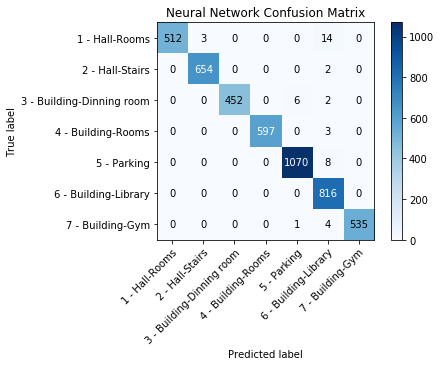

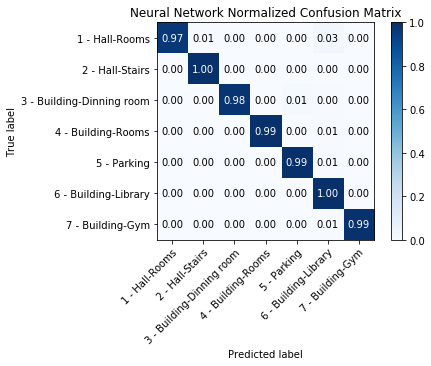

In [8]:
import matplotlib.pyplot as plt

"""
This function has been implemented as the sklearn guide 'Confusion Matrix' says
and has fragments of its code. You can see the base function in this URL:

https://scikit-learn.org/stable/auto_examples/model_selection/
plot_confusion_matrix.html
#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

"""
def plot_confusion_matrix(classes,
                          confusion_matrix,
                          title=None,
                          normalize=False,
                          cmap=plt.cm.Blues):
    plt.rcParams["axes.grid"] = False
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    # Confusion matrix to np Array
    cm = np.array(confusion_matrix)
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
  
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    return ax

def confusion_matrix_analisis(confusion_matrix):
    totalImages = 0
    tp = 0
    for diag,labelResults in enumerate(confusion_matrix):
        tp = tp + int(labelResults[diag])
        for j in labelResults:
            totalImages = totalImages + int(j)
    print("Total Images: " + str(totalImages))
    print("True positives: " + str(tp))
    print("Accuracy: " + str(tp/totalImages))

plot_confusion_matrix(classes=['1 - Hall-Rooms', '2 - Hall-Stairs', '3 - Building-Dinning room', '4 - Building-Rooms', '5 - Parking', '6 - Building-Library','7 - Building-Gym'], 
                      confusion_matrix = confusionMatrix, title='Neural Network Confusion Matrix', normalize=False)

plot_confusion_matrix(classes=['1 - Hall-Rooms', '2 - Hall-Stairs', '3 - Building-Dinning room', '4 - Building-Rooms', '5 - Parking', '6 - Building-Library','7 - Building-Gym'], 
                      confusion_matrix = confusionMatrix, title='Neural Network Normalized Confusion Matrix', normalize=True)

confusion_matrix_analisis(confusion_matrix = confusionMatrix)